In [1]:
from signal_utils import *

In [2]:
C0 = np.array([-0.1667, 0.5, -0.5, 0.1667])
C1 = np.array([0.5, -1, 0.5, 0])
C2 = np.array([-0.3333, -0.5, 1, -1.1667])
C3 = np.array([0, 1, 0, 0])
C = [C0, C1, C2, C3]

# Reverse each Ci to get Hi
H = [np.flip(Ci) for Ci in C]
# Display H
for i, Hi in enumerate(H):
    print(f"H{i} =", Hi)

H0 = [ 0.1667 -0.5     0.5    -0.1667]
H1 = [ 0.   0.5 -1.   0.5]
H2 = [-1.1667  1.     -0.5    -0.3333]
H3 = [0 0 1 0]


In [3]:
def firrow_filter(x, delta):
    C0 = np.array([-0.1667, 0.5, -0.5, 0.1667])
    C1 = np.array([0.5, -1, 0.5, 0])
    C2 = np.array([-0.3333, -0.5, 1, -1.1667])
    C3 = np.array([0, 1, 0, 0])
    C = [C0, C1, C2, C3]
    # Reverse each Ci to get Hi
    H = [np.flip(Ci) for Ci in C]

    y0 = signal.lfilter(H[0], 1.0, x)
    y1 = signal.lfilter(H[1], 1.0, x)
    y2 = signal.lfilter(H[2], 1.0, x)
    y3 = signal.lfilter(H[3], 1.0, x)

    y = y3 + delta*(y2 + delta*(y1 + delta*y0))
        
    return y

-2450.443701217736


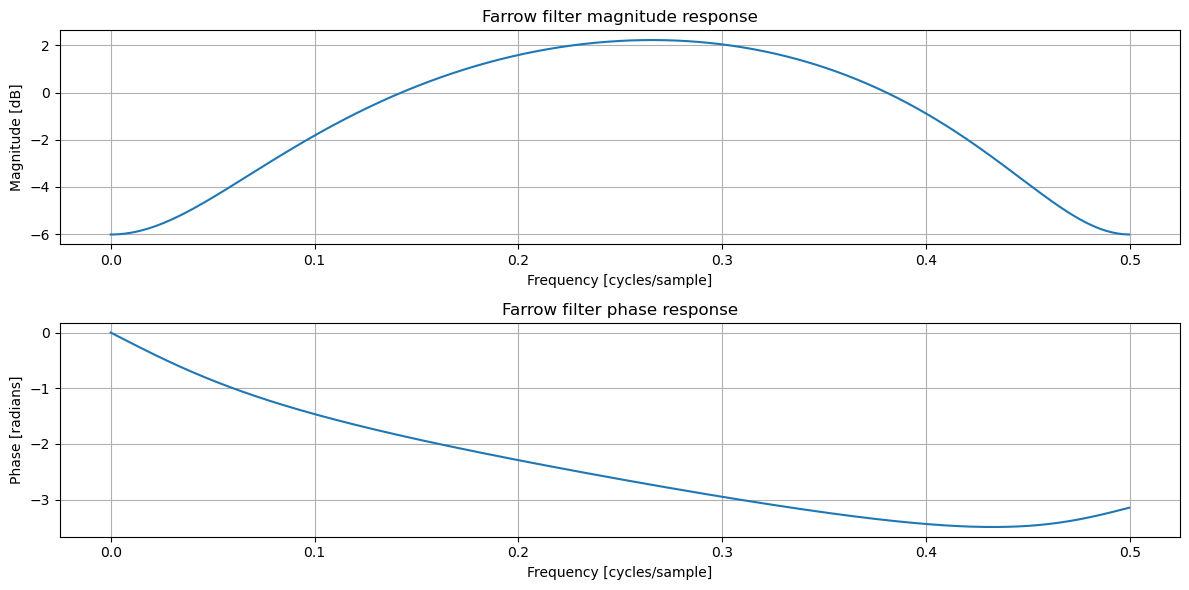

In [4]:
# Impulse signal
N = 1024
impulse = np.zeros(N)
impulse[0] = 1.0

# Apply your Farrow filter to impulse
delta = 0.5
h = firrow_filter(impulse, delta)

# Calculate frequency response
w, H = signal.freqz(h, worN=N, whole=False)

# Convert to cycles/sample
freq = w / (2 * np.pi)

# Phase response in radians
phase_response = np.unwrap(np.angle(H))
print(np.sum(phase_response))

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(freq, 20 * np.log10(np.abs(H)))
plt.title('Farrow filter magnitude response')
plt.xlabel('Frequency [cycles/sample]')
plt.ylabel('Magnitude [dB]')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(freq, phase_response)
plt.title('Farrow filter phase response')
plt.xlabel('Frequency [cycles/sample]')
plt.ylabel('Phase [radians]')
plt.grid()

plt.tight_layout()
plt.show()

In [18]:
N = 256
n = np.arange(N)
F0 = 2/N

OSR = 4*2
AdB = 40
deltaPass = 10**(-AdB/20)
deltaStop = deltaPass
perc = 0.15
Fmax = 0.5 * (1 - perc) 
F = [Fmax, 1-Fmax]
delta = [deltaPass, deltaStop]
deltaFarrow = 0.5

In [19]:
x = 1.0 * np.cos(2*np.pi*n*F0)

from scipy.interpolate import BarycentricInterpolator
import numpy as np

# Example data
x = np.array([0, 1, 2, 3])
y = np.sin(2 * np.pi * x / 4)

# Create interpolator (cubic since 4 points)
interpolator = BarycentricInterpolator(x, y)

# Interpolate at fine grid
x_fine = np.linspace(0, 3, 100)
y_fine = interpolator(x_fine)


Fpass = [0.2125, 0.10625, 0.053125]
Fstop = [0.2875, 0.39375, 0.446875]
dF = [0.07499999999999998, 0.2875, 0.39375000000000004]
N_fir = [27, 7, 7]
[array([ 8.92436845e-03, -8.16701313e-06, -1.20135991e-02,  3.01347455e-06,
        2.01363981e-02, -9.10780391e-06, -3.27055300e-02,  2.61934784e-06,
        5.39932233e-02, -1.29671315e-05, -1.00079570e-01,  1.90701588e-07,
        3.16256381e-01,  4.99990978e-01,  3.16256381e-01,  1.90701588e-07,
       -1.00079570e-01, -1.29671315e-05,  5.39932233e-02,  2.61934784e-06,
       -3.27055300e-02, -9.10780391e-06,  2.01363981e-02,  3.01347455e-06,
       -1.20135991e-02, -8.16701313e-06,  8.92436845e-03]), array([-4.40725527e-02,  4.14268115e-05,  2.91386332e-01,  4.99980658e-01,
        2.91386332e-01,  4.14268115e-05, -4.40725527e-02]), array([-3.39873192e-02,  1.27892054e-05,  2.83839036e-01,  4.99979913e-01,
        2.83839036e-01,  1.27892054e-05, -3.39873192e-02])]
41


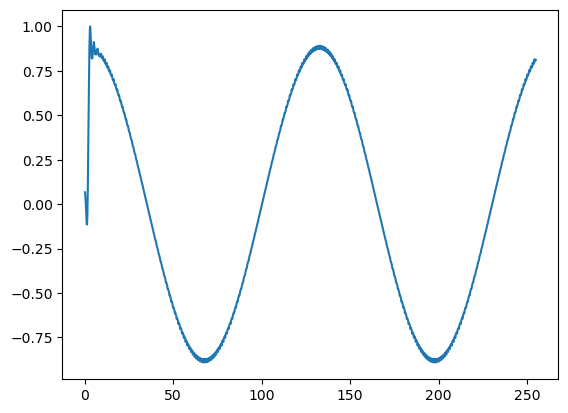

In [20]:
# plt.figure()
# plt.plot(axis_xi, xi)
# plt.stem(axis_x, x, '--k')
plt.plot(axis_xi, xi)